<h1><center>Лабораторная работа №4 "Классификация. Деревья решений".</center></h1>
<h1><center>Вахлаева Марина Олеговна, гр. 6131-010402D</center></h1>

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



### 1. Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [2]:
path = 'C:/Users/PC/Downloads/Python/TAI/datasets/'
df = pd.read_csv(Path(path, 'winequality-red.csv'))

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 2. Датасет и подготовка данных: 

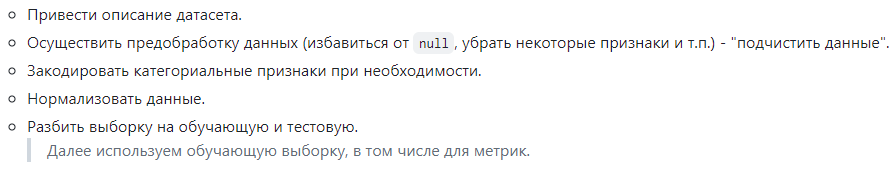

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Описание датасета: 

Набор данных о качестве красного вина. Набор данных содержит 12 признаков, записаных для 1599 наблюдений. Набор для построение регрессионной модели для получения знания о том, как каждая переменная влияет на качество красного вина. Данное знание будет полезно производителям, дистрибьюторам и предприятиям в индустрии красного вина лучше оценить свою стратегию производства, дистрибуции и ценообразования.

Основная цель набора данных о качестве красного вина — предсказать, какие из физико-химических характеристик делают вино хорошим.

Признаки: 

- fixed acidity (Фиксированная кислотность) - нелетучие кислоты, которые легко не испаряются;
- volatile acidity (Летучая кислотность) - высокое содержание уксусной кислоты в вине, что приводит к неприятному вкусу уксуса;
- citric acid (Лимонная кислота) - действует как консервант для повышения кислотности. В небольших количествах придает винам свежесть и аромат;
- residual sugar (Остаточный сахар) - остаточный сахар: количество сахара, остающегося после остановки брожения;
- chlorides (Хлориды) - количество соли в вине;
- free sulfur dioxide (Свободный диоксид серы) - предотвращает рост микробов и окисление вина;
- total sulfur dioxide (Общий диоксид серы) - количество свободных + связанных форм SO2;
- density (Плотность) - более сладкие вина имеют более высокую плотность;
- pH - описывает уровень кислотности по шкале от 0 до 14. Большинство вин всегда имеют рН в диапазоне 3-4;
- sulphates (Сульфаты) - добавка к вину, которая способствует повышению уровня SO2 и действует как противомикробное и антиоксидантное средство;
- alcohol - алкоголь;
- quality (качество) - таргет-признак, в наборе данных есть вина качеств в диапазоне от 3 до 8

**Предварительная обработка данных**

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

NaN значения отсутсвуют в данных

In [6]:
df_ = df.drop(['quality'], axis=1, inplace=False)
df_

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [7]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Классы не сбалансированы

In [8]:
all_cols = list(df_.columns)
mm_scaler = MinMaxScaler()
features_scaled = mm_scaler.fit_transform(df_[all_cols])
df_sc = pd.DataFrame(features_scaled, columns=all_cols)
df_sc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


In [9]:
X, y = df_sc, df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=435)

### 3. Дерево решений:

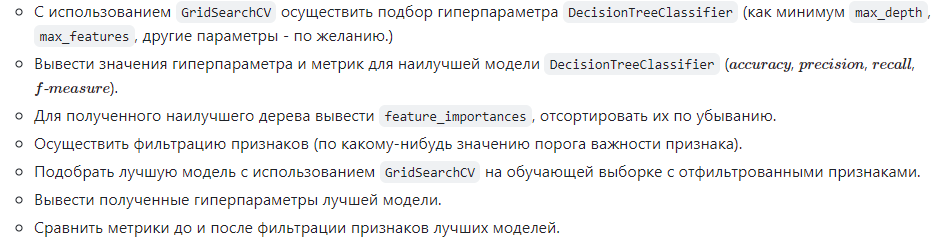

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV

In [11]:
clf_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 17)
clf_tree.fit( X_train, y_train)
y_pred = clf_tree.predict(X_train)

acc1 =accuracy_score(y_pred, y_train) 
precision1 = precision_score(y_train, y_pred, average='weighted', zero_division=0)
rec1 = recall_score(y_train, y_pred, average='weighted', zero_division=0)
f_measure1 = f1_score(y_train, y_pred, average='weighted', zero_division=0)
cl_rep1 = classification_report(y_train, y_pred, zero_division=0)

print('Accuracy: ', acc1)
print('Precision: ', precision1)
print('Recall: ', rec1)
print('f_measure: ', f_measure1)

print(f"Classification Report: \n {cl_rep1}")

Accuracy:  0.5531724754244861
Precision:  0.4503467032517736
Recall:  0.5531724754244861
f_measure:  0.49415800269737803
Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        37
           5       0.60      0.82      0.69       477
           6       0.49      0.51      0.50       446
           7       0.00      0.00      0.00       139
           8       0.00      0.00      0.00        13

    accuracy                           0.55      1119
   macro avg       0.18      0.22      0.20      1119
weighted avg       0.45      0.55      0.49      1119



Дерево со случайными значениями гиперпараметров дает такой результат

#### Выполним подбор гиперпараметров для дерева с помощью `GridSearchCV`

In [12]:
grid = {
    'max_depth': range(1, X.shape[1]),
    'max_features': range(2, 20),
    'criterion': ['gini', 'entropy', 'log_loss']
}

model_tree = DecisionTreeClassifier()

search = GridSearchCV(model_tree, grid, cv = 5, n_jobs= -1, verbose = 2)
search.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 11),
                         'max_features': range(2, 20)},
             verbose=2)

In [13]:
search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 19}

In [14]:
best_model = search.best_estimator_
best_model_pred = best_model.predict(X_train)

#### Выведим значения гиперпараметров полученных с помощью `GridSearchCV` и значения метрик наилучшей модели

In [15]:
acc =accuracy_score(best_model_pred, y_train) 
precision = precision_score(y_train, best_model_pred, average='weighted', zero_division=0)
rec = recall_score(y_train, best_model_pred, average='weighted', zero_division=0)
f_measure = f1_score(y_train, best_model_pred, average='weighted', zero_division=0)
cl_rep = classification_report(y_train, best_model_pred)

print('Accuracy: ', acc)
print('Precision: ', precision)
print('Recall: ', rec)
print('f_measure: ', f_measure)

print(f"Classification Report: \n {cl_rep}")

Accuracy:  0.9124218051831993
Precision:  0.9149341531968281
Recall:  0.9124218051831993
f_measure:  0.9119504185262829
Classification Report: 
               precision    recall  f1-score   support

           3       1.00      0.71      0.83         7
           4       1.00      0.76      0.86        37
           5       0.89      0.95      0.92       477
           6       0.91      0.90      0.91       446
           7       0.97      0.86      0.91       139
           8       1.00      0.77      0.87        13

    accuracy                           0.91      1119
   macro avg       0.96      0.83      0.88      1119
weighted avg       0.91      0.91      0.91      1119



#### Выведем `feature_importances`, отсортируем и отфильтруем признаки

In [16]:
features = zip(X_train.columns, best_model.feature_importances_)
features = sorted(features, key=lambda x: x[1], reverse=True)
len_max = max([len(col) for col in X_train.columns])
for f_name, f_val in features:
    print(f"{f_name:<{len_max}} importance: {f_val:.5f}")

alcohol              importance: 0.20778
sulphates            importance: 0.16774
total sulfur dioxide importance: 0.14156
fixed acidity        importance: 0.09545
volatile acidity     importance: 0.07321
density              importance: 0.06070
pH                   importance: 0.05580
residual sugar       importance: 0.05571
chlorides            importance: 0.05513
free sulfur dioxide  importance: 0.04649
citric acid          importance: 0.04043


В качестве отобранных признаков возьмем первые три. 
'alcohol', 'sulphates', 'total sulfur dioxide'   

#### Подберем гиперпараметры, используя `GridSearchCV` на обучающей выборке с отфильтрованными признаками

In [17]:
features_select = ['alcohol', 'sulphates', 'total sulfur dioxide']
X_train_filter = X_train[features_select]

search_filter = GridSearchCV(model_tree, grid, cv = 5, n_jobs= -1, verbose= 2)
search_filter.fit(X_train_filter, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 11),
                         'max_features': range(2, 20)},
             verbose=2)

In [18]:
search_filter.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 2}

In [19]:
best_model_filter = search_filter.best_estimator_
best_model_filter_pred = best_model_filter.predict(X_train_filter)

In [20]:
acc2 =accuracy_score(best_model_filter_pred, y_train) 
precision2 = precision_score(y_train, best_model_filter_pred, average='weighted', zero_division=0)
rec2 = recall_score(y_train, best_model_filter_pred, average='weighted', zero_division=0)
f_measure2 = f1_score(y_train, best_model_filter_pred, average='weighted', zero_division=0)
cl_rep2 = classification_report(y_train, best_model_filter_pred)

print('Accuracy: ', acc2)
print('Precision: ', precision2)
print('Recall: ', rec2)
print('f_measure: ', f_measure2)

print(f"Classification Report: \n {cl_rep2}")

Accuracy:  0.6890080428954424
Precision:  0.689517017456688
Recall:  0.6890080428954424
f_measure:  0.670615935244343
Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.50      0.05      0.10        37
           5       0.73      0.79      0.76       477
           6       0.64      0.74      0.68       446
           7       0.78      0.42      0.54       139
           8       1.00      0.15      0.27        13

    accuracy                           0.69      1119
   macro avg       0.61      0.36      0.39      1119
weighted avg       0.69      0.69      0.67      1119



D:\NEW_FILES\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NEW_FILES\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NEW_FILES\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Сравнение

Если для классификации данных оставить только 3 признака, которые показали наибольшую "важность", то точность классификации уменьшится. Это можно связать с тем, что информации, заключенной в данных признак не достаточно для точной классификации. 

### 4. Случайный лес:

In [21]:
from sklearn.ensemble import RandomForestClassifier

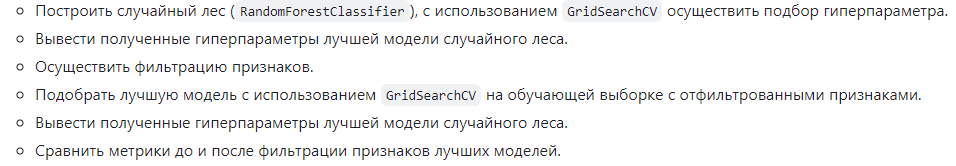

In [22]:
#Посмотрим сначала на модель со случайными параметрами

clf_forest = RandomForestClassifier(n_estimators=20, max_depth = 3, n_jobs=-1, random_state=17)
clf_forest.fit(X_train, y_train)
y_pred_forest = clf_forest.predict(X_train)

acc3 =accuracy_score(y_pred_forest, y_train) 
precision3 = precision_score(y_train, y_pred_forest, average='weighted', zero_division=0)
rec3 = recall_score(y_train, y_pred_forest, average='weighted', zero_division=0)
f_measure3 = f1_score(y_train, y_pred_forest, average='weighted', zero_division=0)
cl_rep3 = classification_report(y_train, y_pred_forest, zero_division=0)

print('Accuracy: ', acc3)
print('Precision: ', precision3)
print('Recall: ', rec3)
print('f_measure: ', f_measure3)

print(f"Classification Report: \n {cl_rep3}")

Accuracy:  0.6157283288650581
Precision:  0.5932937343326956
Recall:  0.6157283288650581
f_measure:  0.5606614630486685
Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        37
           5       0.69      0.79      0.74       477
           6       0.55      0.69      0.61       446
           7       0.67      0.01      0.03       139
           8       0.00      0.00      0.00        13

    accuracy                           0.62      1119
   macro avg       0.32      0.25      0.23      1119
weighted avg       0.59      0.62      0.56      1119



#### Построение модели случайного леса и подбор гиперпараметров с помощью `GridSearchCV`

In [23]:
model_forest_ = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)

model_forest_params = {
    'max_depth': range(1, X.shape[1]),
    'max_features': range(4, X.shape[1])
}

model_forest_grid = GridSearchCV(
    model_forest_, model_forest_params, cv = 5, n_jobs = -1, verbose = True
)

model_forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 11)},
             verbose=True)

In [24]:
model_forest_grid.best_params_

{'max_depth': 10, 'max_features': 6}

In [25]:
best_model_forest = model_forest_grid.best_estimator_
best_model_pred_forest = model_forest_grid.predict(X_train)

In [26]:
acc_forest =accuracy_score(best_model_pred_forest, y_train) 
precision_forest = precision_score(y_train, best_model_pred_forest, average='weighted', zero_division=0)
rec_forest = recall_score(y_train, best_model_pred_forest, average='weighted', zero_division=0)
f_measure_forest = f1_score(y_train, best_model_pred_forest, average='weighted', zero_division=0)
cl_rep_forest = classification_report(y_train, best_model_pred_forest)

print('Accuracy: ', acc_forest)
print('Precision: ', precision_forest)
print('Recall: ', rec_forest)
print('f_measure: ', f_measure_forest)

print(f"Classification Report: \n {cl_rep_forest}")

Accuracy:  0.9544235924932976
Precision:  0.955632581112015
Recall:  0.9544235924932976
f_measure:  0.9538974127306924
Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      0.76      0.86        37
           5       0.95      0.98      0.96       477
           6       0.95      0.96      0.95       446
           7       1.00      0.89      0.94       139
           8       1.00      0.92      0.96        13

    accuracy                           0.95      1119
   macro avg       0.98      0.92      0.95      1119
weighted avg       0.96      0.95      0.95      1119



#### Выведем `feature_importances`, отсортируем и отфильтруем признаки

In [27]:
features_ = zip(X_train.columns, best_model_forest.feature_importances_)
features_ = sorted(features_, key=lambda x: x[1], reverse=True)
len_max_ = max([len(col) for col in X_train.columns])
for f_name, f_val in features_:
    print(f"{f_name:<{len_max}} importance: {f_val:.5f}")

alcohol              importance: 0.20154
sulphates            importance: 0.12532
total sulfur dioxide importance: 0.11167
volatile acidity     importance: 0.10146
density              importance: 0.07922
chlorides            importance: 0.06784
fixed acidity        importance: 0.06666
residual sugar       importance: 0.06591
pH                   importance: 0.06280
citric acid          importance: 0.06059
free sulfur dioxide  importance: 0.05699


В качестве важных признаков выберем первые 4.

#### Подберем гиперпараметры, используя `GridSearchCV` на обучающей выборке с отфильтрованными признаками

In [28]:
features_select_ = ['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity']
X_train_filter_ = X_train[features_select_]

model_forest_grid_ = GridSearchCV(
    model_forest_, model_forest_params, cv = 5, n_jobs = -1, verbose = True
)

model_forest_grid_.fit(X_train_filter_, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 11)},
             verbose=True)

In [29]:
model_forest_grid_.best_params_

{'max_depth': 10, 'max_features': 4}

In [30]:
best_model_forest_ = model_forest_grid_.best_estimator_
best_model_pred_forest_ = model_forest_grid_.predict(X_train_filter_)

In [31]:
acc_forest_ =accuracy_score(best_model_pred_forest_, y_train) 
precision_forest_ = precision_score(y_train, best_model_pred_forest_, average='weighted', zero_division=0)
rec_forest_ = recall_score(y_train, best_model_pred_forest_, average='weighted', zero_division=0)
f_measure_forest_ = f1_score(y_train, best_model_pred_forest_, average='weighted', zero_division=0)
cl_rep_forest_ = classification_report(y_train, best_model_pred_forest_)

print('Accuracy: ', acc_forest_)
print('Precision: ', precision_forest_)
print('Recall: ', rec_forest_)
print('f_measure: ', f_measure_forest_)

print(f"Classification Report: \n {cl_rep_forest_}")

Accuracy:  0.938337801608579
Precision:  0.9399365161138064
Recall:  0.938337801608579
f_measure:  0.9375472383158808
Classification Report: 
               precision    recall  f1-score   support

           3       1.00      0.57      0.73         7
           4       1.00      0.78      0.88        37
           5       0.93      0.97      0.95       477
           6       0.93      0.95      0.94       446
           7       0.98      0.86      0.92       139
           8       1.00      0.92      0.96        13

    accuracy                           0.94      1119
   macro avg       0.97      0.84      0.89      1119
weighted avg       0.94      0.94      0.94      1119



#### Сравнение

Аналогичным образом, как и с деревом решений, уменьшение признаков привело к сокращении информации о данных и тем самым уменьшению точности модели классификации

### 5. Метод ближайших соседей:

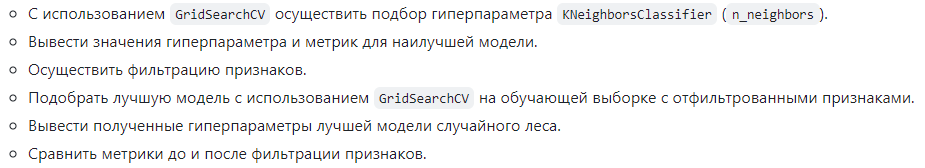

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
#Посмотрим сначала на модель со случанйми параметрами
model_kNN = KNeighborsClassifier(n_neighbors=3)
model_kNN.fit(X_train, y_train)
y_pred_kNN = model_kNN.predict(X_train)


acc_kNN =accuracy_score(y_pred_kNN, y_train) 
precision_kNN = precision_score(y_train, y_pred_kNN, average='weighted', zero_division=0)
rec_kNN = recall_score(y_train, y_pred_kNN, average='weighted', zero_division=0)
f_measure_kNN = f1_score(y_train, y_pred_kNN, average='weighted', zero_division=0)
cl_rep_kNN = classification_report(y_train, y_pred_kNN, zero_division=0)

print('Accuracy: ', acc_kNN)
print('Precision: ', precision_kNN)
print('Recall: ', rec_kNN)
print('f_measure: ', f_measure_kNN)

print(f"Classification Report: \n {cl_rep_kNN}")

Accuracy:  0.7649687220732797
Precision:  0.762037636964595
Recall:  0.7649687220732797
f_measure:  0.7606624539510513
Classification Report: 
               precision    recall  f1-score   support

           3       0.60      0.43      0.50         7
           4       0.52      0.46      0.49        37
           5       0.79      0.83      0.81       477
           6       0.76      0.78      0.77       446
           7       0.75      0.63      0.68       139
           8       0.67      0.15      0.25        13

    accuracy                           0.76      1119
   macro avg       0.68      0.55      0.58      1119
weighted avg       0.76      0.76      0.76      1119



#### Построение модели `KNeighborsClassifier` и подбор гиперпараметров с помощью `GridSearchCV`

In [34]:
model_kNN_1 = KNeighborsClassifier()

model_kNN_params = {
    'n_neighbors': range(1, 7)
}

model_kNN_grid = GridSearchCV(
    model_kNN_1, model_kNN_params, cv = 5, n_jobs = -1, verbose = True
)

model_kNN_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 7)}, verbose=True)

In [35]:
model_kNN_grid.best_params_

{'n_neighbors': 1}

In [36]:
best_model_kNN = model_kNN_grid.best_estimator_
best_model_pred_kNN = model_kNN_grid.predict(X_train)

In [37]:
acc_kNN_1 =accuracy_score(best_model_pred_kNN, y_train) 
precision_kNN_1 = precision_score(y_train, best_model_pred_kNN, average='weighted', zero_division=0)
rec_kNN_1 = recall_score(y_train, best_model_pred_kNN, average='weighted', zero_division=0)
f_measure_kNN_1 = f1_score(y_train, best_model_pred_kNN, average='weighted', zero_division=0)
cl_rep_kNN_1 = classification_report(y_train, best_model_pred_kNN)

print('Accuracy: ', acc_kNN_1)
print('Precision: ', precision_kNN_1)
print('Recall: ', rec_kNN_1)
print('f_measure: ', f_measure_kNN_1)

print(f"Classification Report: \n {cl_rep_kNN_1}")

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
f_measure:  1.0
Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       446
           7       1.00      1.00      1.00       139
           8       1.00      1.00      1.00        13

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



#### Подберем гиперпараметры, используя `GridSearchCV` на обучающей выборке с отфильтрованными признаками

In [38]:
model_kNN_grid_ = GridSearchCV(
    model_kNN_1, model_kNN_params, cv = 5, n_jobs = -1, verbose = True
)

model_kNN_grid_.fit(X_train_filter, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 7)}, verbose=True)

In [39]:
model_kNN_grid_.best_params_

{'n_neighbors': 5}

In [40]:
best_model_kNN_ = model_kNN_grid_.best_estimator_
best_model_pred_kNN_ = model_kNN_grid_.predict(X_train_filter)

In [41]:
acc_kNN_2 =accuracy_score(best_model_pred_kNN_, y_train) 
precision_kNN_2 = precision_score(y_train, best_model_pred_kNN_, average='weighted', zero_division=0)
rec_kNN_2 = recall_score(y_train, best_model_pred_kNN_, average='weighted', zero_division=0)
f_measure_kNN_2 = f1_score(y_train, best_model_pred_kNN_, average='weighted', zero_division=0)
cl_rep_kNN_2 = classification_report(y_train, best_model_pred_kNN_, zero_division=0)

print('Accuracy: ', acc_kNN_2)
print('Precision: ', precision_kNN_2)
print('Recall: ', rec_kNN_2)
print('f_measure: ', f_measure_kNN_2)

print(f"Classification Report: \n {cl_rep_kNN_2}")

Accuracy:  0.7015192135835567
Precision:  0.6810623981764803
Recall:  0.7015192135835567
f_measure:  0.6876580371549116
Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.47      0.24      0.32        37
           5       0.74      0.82      0.78       477
           6       0.68      0.72      0.70       446
           7       0.62      0.46      0.53       139
           8       0.00      0.00      0.00        13

    accuracy                           0.70      1119
   macro avg       0.42      0.37      0.39      1119
weighted avg       0.68      0.70      0.69      1119



#### Сравнение

Как и во всех предыдущих моделях. Использование мЕньшего числа признаков в X_train выборки привело к уменьшению точности модели классификации

### 7. Оценка качества построенных моделей
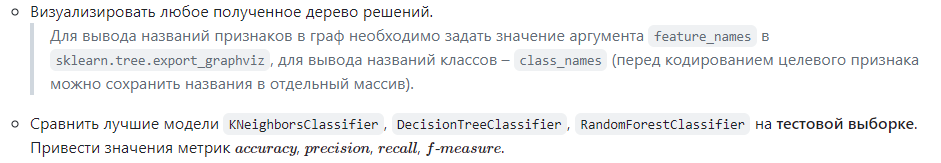

In [42]:
import graphviz
import sklearn

In [43]:
# Визуализируем дерево
data_path = "./images/"
sklearn.tree.export_graphviz(
    search.best_estimator_,
    feature_names=X_train.columns,
    class_names=['5', '6', '7', '4', '8', '3'],
    out_file=f'{data_path}/rain_tree__.dot', filled=True
)

!{'D:/Graphviz/bin/dot.exe'} -Tpng ./images/rain_tree__.dot -o ./images/rain_tree__.png

<div align="center">
  <img src="images/rain_tree__.png"/>
  <p style="text-align: center">
  </p>
</div>

Сравним лучшие модели `DecisionTreeClassifier`, `RandomForestClassifier`, `KNeighborsClassifier`, на тестовой выборке. Выведем метрики.

In [44]:
tree_model_pred = best_model.predict(X_test)
forest_model_pred = model_forest_grid.predict(X_test)
kNN_model_pred = model_kNN_grid.predict(X_test)

tree_model_acc =accuracy_score(tree_model_pred, y_test) 
tree_model_precision = precision_score(y_test, tree_model_pred, average='weighted', zero_division=0)
tree_model_rec = recall_score(y_test, tree_model_pred, average='weighted', zero_division=0)
tree_model_f_measure = f1_score(y_test, tree_model_pred, average='weighted', zero_division=0)

forest_model_acc =accuracy_score(forest_model_pred, y_test) 
forest_model_precision = precision_score(y_test, forest_model_pred, average='weighted', zero_division=0)
forest_model_rec = recall_score(y_test, forest_model_pred, average='weighted', zero_division=0)
forest_model_f_measure = f1_score(y_test, forest_model_pred, average='weighted', zero_division=0)

kNN_model_acc =accuracy_score(kNN_model_pred, y_test) 
kNN_model_precision = precision_score(y_test, kNN_model_pred, average='weighted', zero_division=0)
kNN_model_rec = recall_score(y_test, kNN_model_pred, average='weighted', zero_division=0)
kNN_model_f_measure = f1_score(y_test, kNN_model_pred, average='weighted', zero_division=0)


print('For Dicision Tree:')
print(f"accuracy: {tree_model_acc}; precision: {tree_model_precision}; Recall: {tree_model_rec}; f_measure: {tree_model_f_measure}")
print('For Random Forest:')
print(f"accuracy: {forest_model_acc}; precision: {forest_model_precision}; Recall: {forest_model_rec}; f_measure: {forest_model_f_measure}")
print('For kNN:')
print(f"accuracy: {kNN_model_acc}; precision: {kNN_model_precision}; Recall: {kNN_model_rec}; f_measure: {kNN_model_f_measure}")

For Dicision Tree:
accuracy: 0.5916666666666667; precision: 0.5799649857606906; Recall: 0.5916666666666667; f_measure: 0.582527603061498
For Random Forest:
accuracy: 0.6583333333333333; precision: 0.6271291281125404; Recall: 0.6583333333333333; f_measure: 0.6392721920710536
For kNN:
accuracy: 0.6395833333333333; precision: 0.6327291133844841; Recall: 0.6395833333333333; f_measure: 0.6351521681927703


Случаный лес дал лучший результат из всех моделей